In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#**ADDING DATASET**

MAGIC Gamma Telescope

https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [3]:
# ADD LABEL TO THE TABLE
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

# READ DATASET
df = pd.read_csv('magic04.data', names = cols)

# CHANGE CLASS FROM CHAR INTO INT (ENCODING)
# GAMMA AS 1, HADRON AS 0
df["class"] = (df["class"]== "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


#**VISUALIZING EACH COLUMNS AND COMPARING THEM BASED ON THE CLASS**

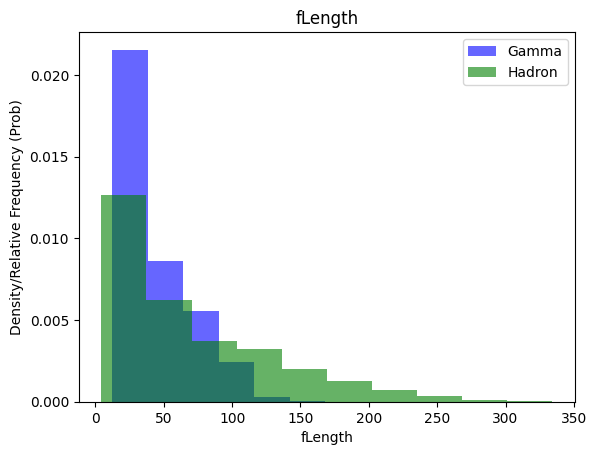

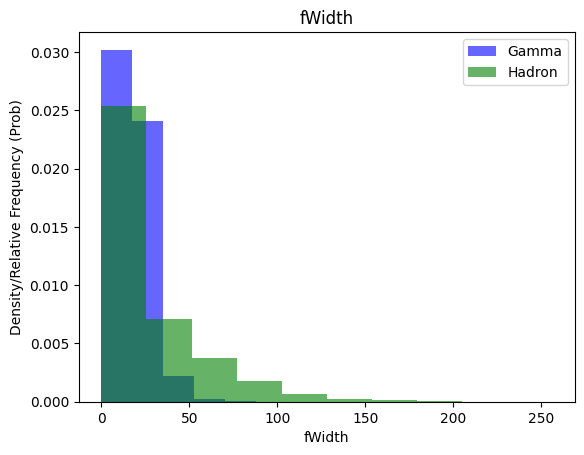

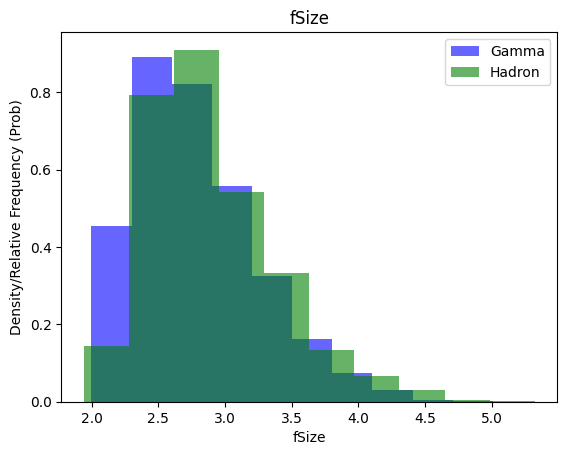

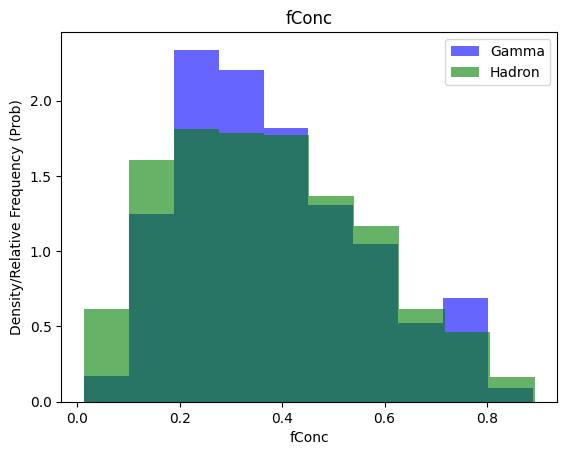

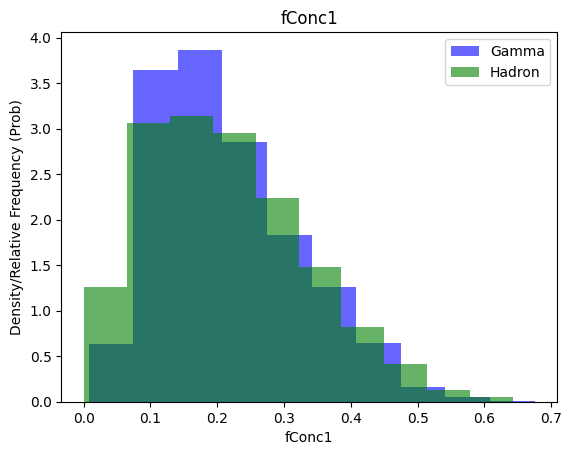

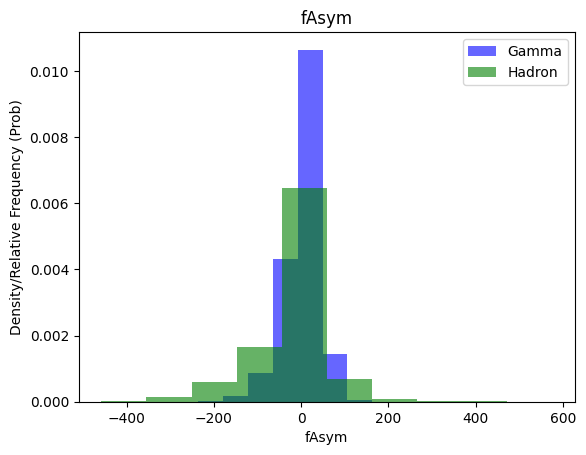

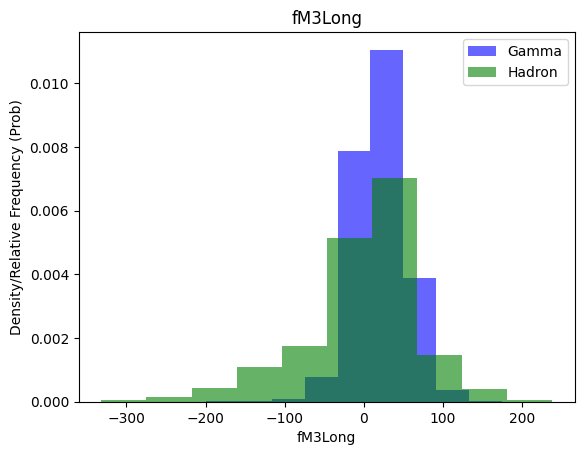

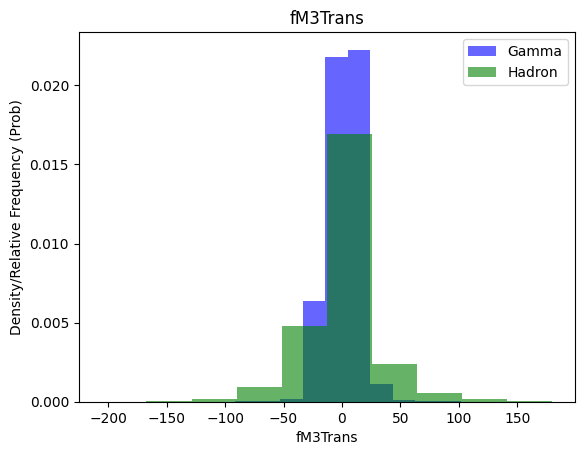

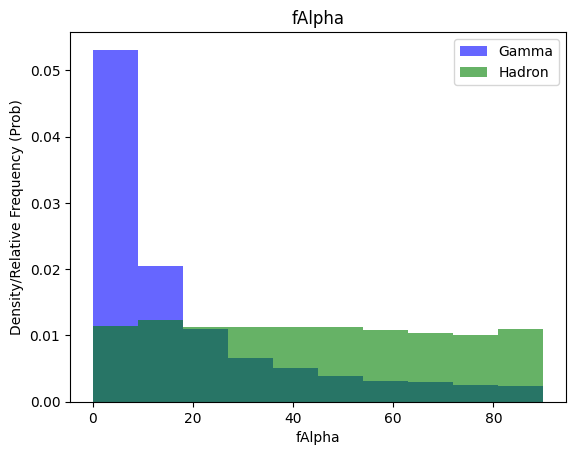

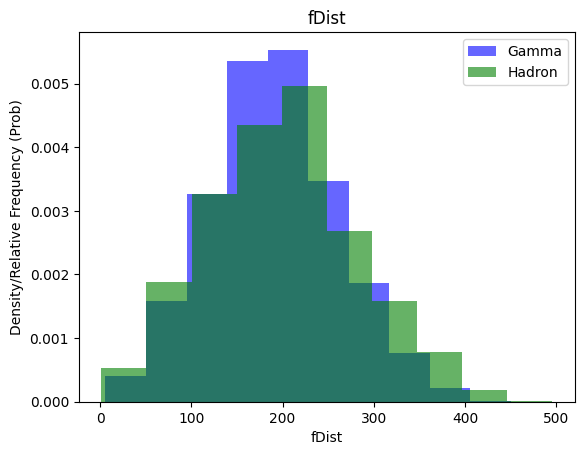

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [102]:
for dfLabel in df.columns[:-1]:
    # Create a new figure for each feature
    plt.figure()

    # Plot histogram for class 1
    plt.hist(df[df["class"] == 1][dfLabel], color='blue', label='Gamma', alpha=0.6, density=True)
    # Plot histogram for class 0
    plt.hist(df[df["class"] == 0][dfLabel], color='green', label='Hadron', alpha=0.6, density=True)

    # Set title, labels, and legend for the plot
    plt.title(dfLabel)
    plt.ylabel("Density/Relative Frequency (Prob)")
    plt.xlabel(dfLabel)
    plt.legend()

    # Show the plot
    plt.show()

df.head()

#**PREPARING DATASET FOR TRAINING, VALIDATION, AND TEST**

Sampling, scaling, normalization/standardization, oversampling, etc.

In [117]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [118]:
# MAKE STANDARDIZATION AND OVERSAMPLE SCALING FUNCTION
# Param = 1. dataframe, 2. oversample (true or false)
# Return = 1. dataframe, 2. X_dataframe (feature), 3. y_dataframe (target)

def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  # Standardization must be done because there are gaps on each column's values (the technique is likely the same as normalization)
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # In this case the  gamma's dataset (class 1) is more than the hadron's (class 0), that can be an issue.
  # We have to make the train hadron's amount is the same as gamma's by oversampling.
  # Take more of the less class' ammount of dataset, increase the amount and keep sampling from there so the that their amount matches (equal).
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  # Merge the data again with y in a 2d array horizontal stack. The y is reshaped into 2d (?)
  data=np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [119]:
# SHOW TRAIN DATASET
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
11447,29.7142,18.3829,2.6144,0.3256,0.1665,-32.0756,14.9118,-14.8931,67.6170,179.2500,1
16872,167.0905,60.6303,3.4442,0.3440,0.1965,-127.0627,-141.6958,47.3337,6.9414,359.4006,0
838,46.9295,17.1961,2.6857,0.2804,0.1515,73.3198,-33.7309,5.4989,8.4913,176.3720,1
16735,29.7108,17.1893,2.6699,0.5359,0.2866,22.6386,23.5657,19.5622,11.3994,153.8179,0
3603,77.0826,25.4232,3.4002,0.2006,0.1041,-53.2658,69.2391,-20.8604,5.0251,275.4760,1
...,...,...,...,...,...,...,...,...,...,...,...
11136,64.4978,19.6105,3.1316,0.1721,0.0919,1.5001,42.9179,-12.3246,6.7720,227.2960,1
10830,12.6382,11.7899,2.2492,0.7099,0.3577,-15.1386,4.4607,11.4721,67.6997,213.9180,1
6660,93.4214,17.8618,3.1178,0.1899,0.1087,-54.5623,85.6221,-6.0429,7.6036,307.5380,1
4129,31.4932,17.9121,2.7097,0.3122,0.1649,-30.5760,19.6037,12.8331,19.0525,206.0320,1


In [120]:
# DECLARE AND USE THE FUNCTION

train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [126]:
print(sum(y_train==1))
print(sum(y_train==0))
print(len(y_train))

7400
7400
14800


Now the data is scaled and the data is ready.

#kKN

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [128]:
knn_model = KNeighborsClassifier(n_neighbors=1)

# Fitting the model into the dataset
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Let's see the target test and prediction (in this case the visible are 6/6 which is pretty good)

In [129]:
y_pred = knn_model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [131]:
y_test

array([1, 0, 1, ..., 0, 1, 1])

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1377
           1       0.82      0.89      0.86      2427

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Precision = True positives / (All true labeled)

Recall = True positives / (Relevant elements)

All true labeled means true positives + false positives.
Relevant elements means true positives + false negatives.

https://en.wikipedia.org/wiki/Precision_and_recall